In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PCA


In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values

In [19]:
# Standardize the feature vectors
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [23]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
principalDf.describe()

,principal component 1,principal component 2
count,1.500000e+02,1.500000e+02
mean,2.671937e-16,5.338322e-17
std,1.711828e+00,9.630180e-01
min,-2.774170e+00,-2.658063e+00
25%,-2.121636e+00,-5.946612e-01
50%,4.145452e-01,8.434525e-03
75%,1.342582e+00,5.878221e-01
max,3.309141e+00,2.722371e+00


In [25]:
finalDf = pd.concat( [principalDf, df[['target']]], axis=1 )
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


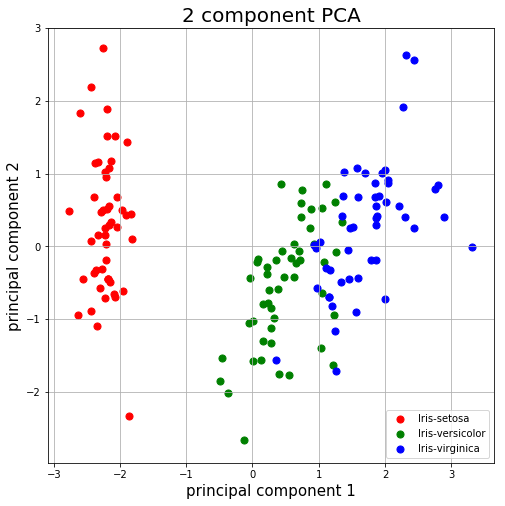

In [26]:
# initialize pyplot for visualization
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize=15)
ax.set_ylabel('principal component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indice2keep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indice2keep, 'principal component 1']
             , finalDf.loc[indice2keep, 'principal component 2']
             , c = color
             , s = 50)
    ax.legend(targets)
    ax.grid()
    

In [27]:
pca.explained_variance_

array([2.93035378, 0.92740362])